###*MARVEL vs DC*

##*Gender*

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link_marvel = '1MzMyOdZayjFnNUC04G5RR3Gnjm0tgTEW'

link_dc = '1c2ikQMvwOQ0H83SA0HZGbj77DthZ-N8y'

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import numpy as np
import pandas as pd
downloaded = drive.CreateFile({'id':link_marvel}) 
downloaded.GetContentFile('marvel-wikia-data.csv')  
df_marvel = pd.read_csv('marvel-wikia-data.csv',sep=',')

downloaded = drive.CreateFile({'id':link_dc}) 
downloaded.GetContentFile('dc-wikia-data.csv')  
df_dc = pd.read_csv('dc-wikia-data.csv',sep=',')

In [6]:
#Generate variable "Universe" to distinguish between the two datasets when both are combined in one
df_marvel['Universe'] = 'Marvel'
df_dc['Universe'] = 'DC'

In [7]:
df_marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,Universe
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,Marvel
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,Marvel
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,Marvel
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,Marvel
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,Marvel


In [8]:
#Change variable name so they are the same in both Datasets (Marvel and DC)
df_marvel['YEAR'] = df_marvel['Year']
df_marvel= df_marvel.drop(['Year'], axis=1)

In [9]:
df_marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Universe,YEAR
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,Marvel,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,Marvel,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,Marvel,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,Marvel,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,Marvel,1950.0


In [10]:
df_dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Universe
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,DC
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,DC
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,DC
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,DC


In [11]:
#Combine the two datasets in one
df = pd.concat([df_marvel, df_dc])

In [12]:
#Just checking that the variable is ok
df['Universe'].unique()

array(['Marvel', 'DC'], dtype=object)

In [13]:
#We want to estimate the importance of the character using the variable "Appearances" divided by the years the character hase since it was created. We did this becouse most popular character are going to appear more, but also if the character is very old it can appear more also.
df['Years_delta'] = 2014 - df['YEAR']
df['IMPORTANCE'] = df['APPEARANCES']/df['YEAR']

In [14]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Universe,YEAR,Years_delta,IMPORTANCE
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,Marvel,1962.0,52.0,2.060652
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,Marvel,1941.0,73.0,1.731066
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,Marvel,1974.0,40.0,1.550659
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,Marvel,1963.0,51.0,1.508406
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,Marvel,1950.0,64.0,1.157949


In [15]:
#Just if you want to download the new Dataset in a CSV
from google.colab import files
df.to_csv('Marvel_vs_DC.csv') 
files.download('Marvel_vs_DC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
#We want to know how many characters of each gender and of each Universe where created by Year. To do so, we grouped the dataset using 'YEAR','Universe','SEX' generating a new Dataset
df_Year_Sex_Univ = df.groupby(['YEAR','Universe','SEX']).size().reset_index(name='counts')
df_Year_Sex_Univ

,YEAR,Universe,SEX,counts
0,1935.0,DC,Male Characters,1
1,1936.0,DC,Female Characters,2
2,1936.0,DC,Male Characters,7
3,1937.0,DC,Female Characters,1
4,1937.0,DC,Male Characters,3
...,...,...,...,...
335,2012.0,Marvel,Male Characters,140
336,2013.0,DC,Male Characters,1
337,2013.0,Marvel,Agender Characters,5
338,2013.0,Marvel,Female Characters,54


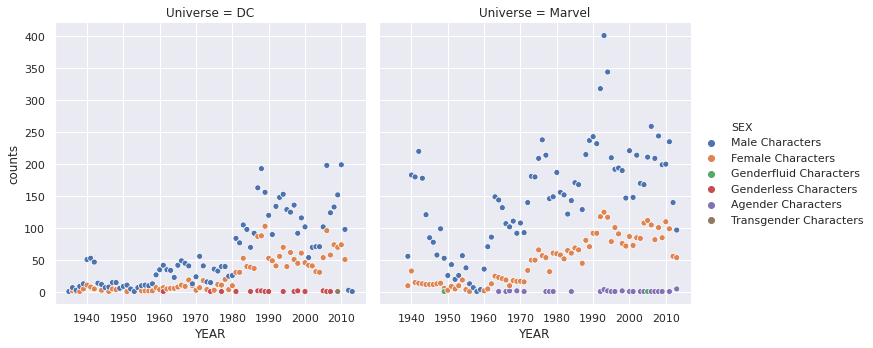

In [17]:
#Graphic showing the number of new characters created by year and by gender
sns.set()

sns.relplot(x="YEAR", y="counts", col="Universe",
            hue="SEX",
            data=df_Year_Sex_Univ);

In [18]:
#We also wanted the proportion of characters of each gender and of each Universe where created by Year. To do so, we also calculated the total character of each universe by Year.
df_Year_Sex_Univ_total = df.groupby(['YEAR','Universe']).size().reset_index(name='counts')
df_Year_Sex_Univ_total['Totals'] = df_Year_Sex_Univ_total['counts']
df_Year_Sex_Univ_total = df_Year_Sex_Univ_total.drop(['counts'], axis=1)
df_Year_Sex_Univ_total

,YEAR,Universe,Totals
0,1935.0,DC,1
1,1936.0,DC,9
2,1937.0,DC,4
3,1938.0,DC,10
4,1939.0,DC,18
...,...,...,...
149,2011.0,Marvel,349
150,2012.0,DC,5
151,2012.0,Marvel,201
152,2013.0,DC,1


In [19]:
#Now we combine the Dataset with the Total count with the count by gender
inner_join = pd.merge(df_Year_Sex_Univ,  
                      df_Year_Sex_Univ_total,  
                      on =['YEAR','Universe'],  
                      how ='inner') 
inner_join

,YEAR,Universe,SEX,counts,Totals
0,1935.0,DC,Male Characters,1,1
1,1936.0,DC,Female Characters,2,9
2,1936.0,DC,Male Characters,7,9
3,1937.0,DC,Female Characters,1,4
4,1937.0,DC,Male Characters,3,4
...,...,...,...,...,...
335,2012.0,Marvel,Male Characters,140,201
336,2013.0,DC,Male Characters,1,1
337,2013.0,Marvel,Agender Characters,5,167
338,2013.0,Marvel,Female Characters,54,167


In [20]:
#Now we calculate the proportion of character by gender for each year.
inner_join ['Prop'] = inner_join ['counts'] / inner_join ['Totals'] *100
inner_join

,YEAR,Universe,SEX,counts,Totals,Prop
0,1935.0,DC,Male Characters,1,1,100.000000
1,1936.0,DC,Female Characters,2,9,22.222222
2,1936.0,DC,Male Characters,7,9,77.777778
3,1937.0,DC,Female Characters,1,4,25.000000
4,1937.0,DC,Male Characters,3,4,75.000000
...,...,...,...,...,...,...
335,2012.0,Marvel,Male Characters,140,201,69.651741
336,2013.0,DC,Male Characters,1,1,100.000000
337,2013.0,Marvel,Agender Characters,5,167,2.994012
338,2013.0,Marvel,Female Characters,54,167,32.335329


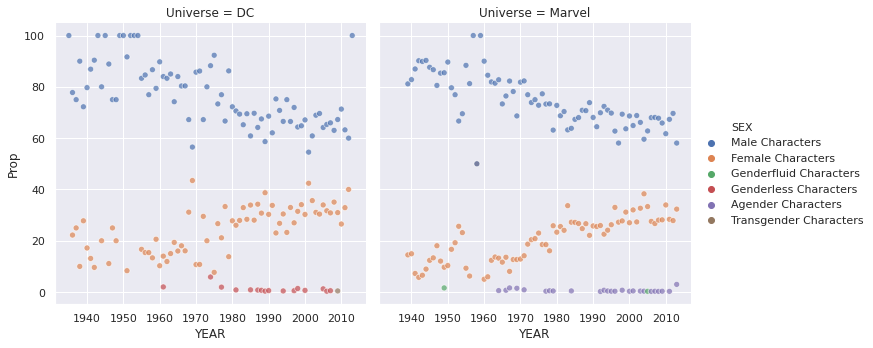

In [21]:
#Graphic showing the proportion of new characters created by year and by gender
sns.set()

sns.relplot(x="YEAR", y="Prop", col="Universe",
            hue="SEX", alpha=.7,
            data=inner_join);

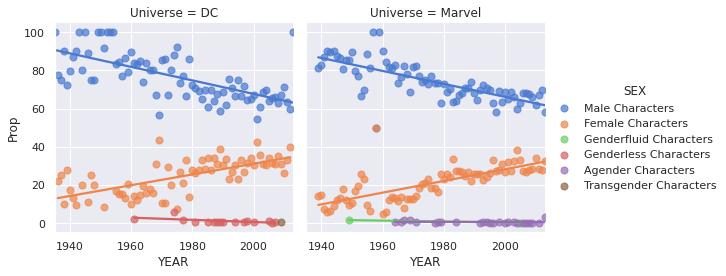

In [22]:
#Same grafic than the one above but with linear regression within each dataset. As you can see in both Universes the tendency is to have 50% proportion of Male and Females. Also un-common genders start to appear in the last years. however the ammount is still low to have a tendency

sns.lmplot(x="YEAR", y="Prop", col="Universe", hue="SEX", data=inner_join,
           col_wrap=2, ci=None, palette="muted", height=4, 
           scatter_kws={"s": 50, "alpha": 0.7})

In [23]:
#Now we want to generate the same Graphic than before, but now including the mean Importance of the Characters from that year.
df_App = df.groupby(['YEAR','Universe','SEX']).mean().reset_index()
df_App

,YEAR,Universe,SEX,page_id,APPEARANCES,Years_delta,IMPORTANCE
0,1935.0,DC,Male Characters,1702.000000,125.000000,79.0,0.064599
1,1936.0,DC,Female Characters,198449.000000,14.000000,78.0,0.007231
2,1936.0,DC,Male Characters,126934.000000,35.333333,78.0,0.018251
3,1937.0,DC,Female Characters,134362.000000,11.000000,77.0,0.005679
4,1937.0,DC,Male Characters,33586.000000,149.000000,77.0,0.076923
...,...,...,...,...,...,...,...
335,2012.0,Marvel,Male Characters,571447.921429,6.106557,2.0,0.003035
336,2013.0,DC,Male Characters,85254.000000,1.000000,1.0,0.000497
337,2013.0,Marvel,Agender Characters,585988.400000,16.000000,1.0,0.007948
338,2013.0,Marvel,Female Characters,625022.666667,9.096154,1.0,0.004519


In [24]:
#Now we combine the mean of Importance with the previous Dataframe
inner_join_2 = pd.merge(inner_join,  
                      df_App,  
                      on =['YEAR','Universe','SEX'],  
                      how ='inner') 
inner_join_2

,YEAR,Universe,SEX,counts,Totals,Prop,page_id,APPEARANCES,Years_delta,IMPORTANCE
0,1935.0,DC,Male Characters,1,1,100.000000,1702.000000,125.000000,79.0,0.064599
1,1936.0,DC,Female Characters,2,9,22.222222,198449.000000,14.000000,78.0,0.007231
2,1936.0,DC,Male Characters,7,9,77.777778,126934.000000,35.333333,78.0,0.018251
3,1937.0,DC,Female Characters,1,4,25.000000,134362.000000,11.000000,77.0,0.005679
4,1937.0,DC,Male Characters,3,4,75.000000,33586.000000,149.000000,77.0,0.076923
...,...,...,...,...,...,...,...,...,...,...
335,2012.0,Marvel,Male Characters,140,201,69.651741,571447.921429,6.106557,2.0,0.003035
336,2013.0,DC,Male Characters,1,1,100.000000,85254.000000,1.000000,1.0,0.000497
337,2013.0,Marvel,Agender Characters,5,167,2.994012,585988.400000,16.000000,1.0,0.007948
338,2013.0,Marvel,Female Characters,54,167,32.335329,625022.666667,9.096154,1.0,0.004519


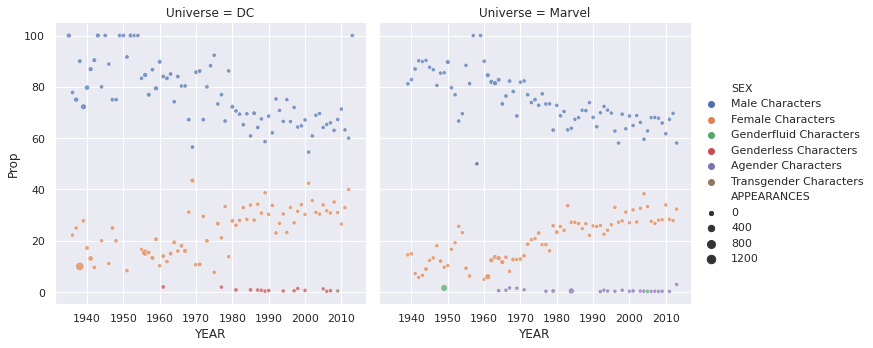

In [25]:
#Once is combined we can include the mean importance of the characters created that year with the size of the dots.
sns.set()

sns.relplot(x="YEAR", y="Prop", col="Universe",
            hue="SEX", alpha=.7, size='APPEARANCES',
            data=inner_join_2);

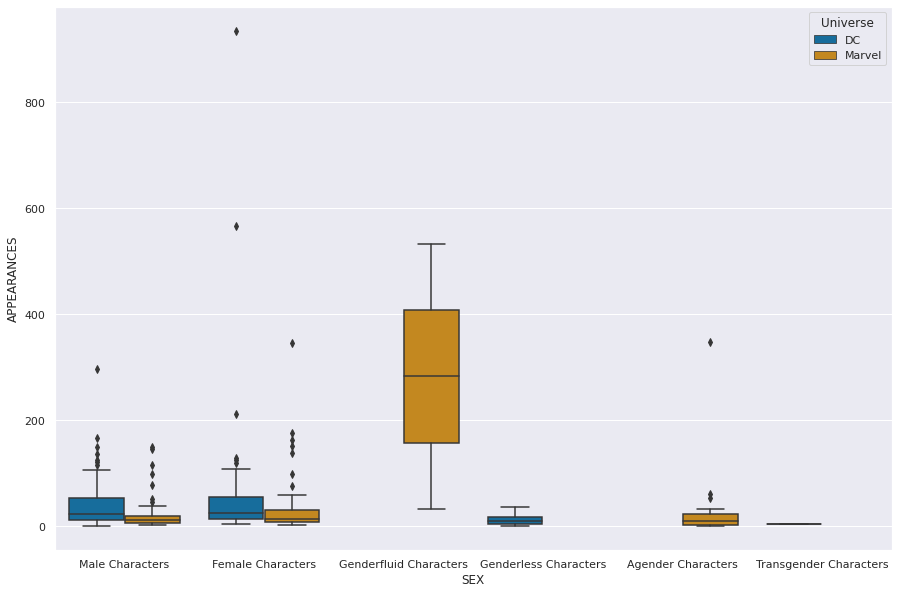

In [26]:
#Checking distribution of 'APPEARANCES' variable
plt.figure(figsize=(15,10))
sns.boxplot(y='APPEARANCES', x='SEX', 
                 data=inner_join_2, 
                 palette="colorblind",
                 hue='Universe')

plt.show()

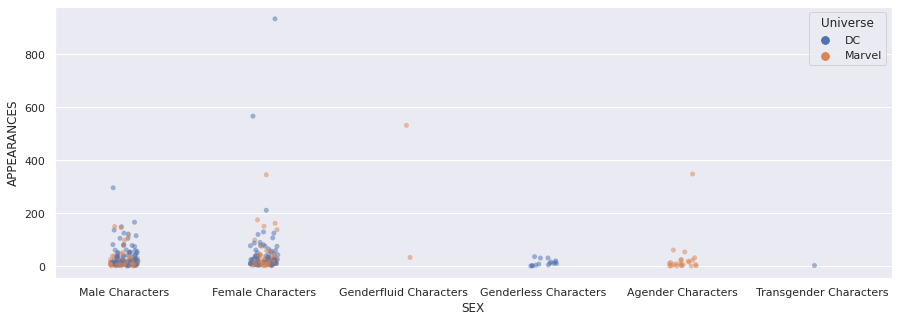

In [27]:
#Same but with scatter plot
plt.figure(figsize=(15,5))
sns.stripplot(y='APPEARANCES', x='SEX', 
                 data=inner_join_2, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   hue='Universe')
plt.show()

In [28]:
#Just if you want to download the dataframe into a CSV
from google.colab import files
inner_join_2.to_csv('inner_join_2.csv') 
files.download('inner_join_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
#The mean Importance was not really informative, since the number of characters created each year where variable. 
#If an important character was creates among other non-important characters the mean was reducing his relevance compare to characters crated alone in one year.
#We decided to use the maximum Appearance of the characters created that year.

df_App_max = df.groupby(['YEAR','Universe','SEX'])['APPEARANCES'].max().reset_index()
df_App_max['APPEARANCES_max'] = df_App_max['APPEARANCES'] 
df_App_max=df_App_max.drop(['APPEARANCES'], axis=1)
df_App_max

,YEAR,Universe,SEX,APPEARANCES_max
0,1935.0,DC,Male Characters,125.0
1,1936.0,DC,Female Characters,15.0
2,1936.0,DC,Male Characters,92.0
3,1937.0,DC,Female Characters,11.0
4,1937.0,DC,Male Characters,213.0
...,...,...,...,...
335,2012.0,Marvel,Male Characters,70.0
336,2013.0,DC,Male Characters,1.0
337,2013.0,Marvel,Agender Characters,28.0
338,2013.0,Marvel,Female Characters,53.0


In [30]:
#The same but with Max Importance in stead of Max Appearance 
df_Imp_max = df.groupby(['YEAR','Universe','SEX'])['IMPORTANCE'].max().reset_index()
df_Imp_max['IMPORTANCE_max'] = df_Imp_max['IMPORTANCE'] 
df_Imp_max=df_Imp_max.drop(['IMPORTANCE'], axis=1)
df_Imp_max

,YEAR,Universe,SEX,IMPORTANCE_max
0,1935.0,DC,Male Characters,0.064599
1,1936.0,DC,Female Characters,0.007748
2,1936.0,DC,Male Characters,0.047521
3,1937.0,DC,Female Characters,0.005679
4,1937.0,DC,Male Characters,0.109964
...,...,...,...,...
335,2012.0,Marvel,Male Characters,0.034791
336,2013.0,DC,Male Characters,0.000497
337,2013.0,Marvel,Agender Characters,0.013910
338,2013.0,Marvel,Female Characters,0.026329


In [31]:
#Adding variable Max Appearance to the Data Frame
inner_join_3 = pd.merge(inner_join_2,  
                      df_App_max,  
                      on =['YEAR','Universe','SEX'],  
                      how ='inner') 
inner_join_3

,YEAR,Universe,SEX,counts,Totals,Prop,page_id,APPEARANCES,Years_delta,IMPORTANCE,APPEARANCES_max
0,1935.0,DC,Male Characters,1,1,100.000000,1702.000000,125.000000,79.0,0.064599,125.0
1,1936.0,DC,Female Characters,2,9,22.222222,198449.000000,14.000000,78.0,0.007231,15.0
2,1936.0,DC,Male Characters,7,9,77.777778,126934.000000,35.333333,78.0,0.018251,92.0
3,1937.0,DC,Female Characters,1,4,25.000000,134362.000000,11.000000,77.0,0.005679,11.0
4,1937.0,DC,Male Characters,3,4,75.000000,33586.000000,149.000000,77.0,0.076923,213.0
...,...,...,...,...,...,...,...,...,...,...,...
335,2012.0,Marvel,Male Characters,140,201,69.651741,571447.921429,6.106557,2.0,0.003035,70.0
336,2013.0,DC,Male Characters,1,1,100.000000,85254.000000,1.000000,1.0,0.000497,1.0
337,2013.0,Marvel,Agender Characters,5,167,2.994012,585988.400000,16.000000,1.0,0.007948,28.0
338,2013.0,Marvel,Female Characters,54,167,32.335329,625022.666667,9.096154,1.0,0.004519,53.0


In [32]:
#Also adding variable Max Importance to the Data Frame
inner_join_4 = pd.merge(inner_join_3,  
                      df_Imp_max,  
                      on =['YEAR','Universe','SEX'],  
                      how ='inner') 
inner_join_4

,YEAR,Universe,SEX,counts,Totals,Prop,page_id,APPEARANCES,Years_delta,IMPORTANCE,APPEARANCES_max,IMPORTANCE_max
0,1935.0,DC,Male Characters,1,1,100.000000,1702.000000,125.000000,79.0,0.064599,125.0,0.064599
1,1936.0,DC,Female Characters,2,9,22.222222,198449.000000,14.000000,78.0,0.007231,15.0,0.007748
2,1936.0,DC,Male Characters,7,9,77.777778,126934.000000,35.333333,78.0,0.018251,92.0,0.047521
3,1937.0,DC,Female Characters,1,4,25.000000,134362.000000,11.000000,77.0,0.005679,11.0,0.005679
4,1937.0,DC,Male Characters,3,4,75.000000,33586.000000,149.000000,77.0,0.076923,213.0,0.109964
...,...,...,...,...,...,...,...,...,...,...,...,...
335,2012.0,Marvel,Male Characters,140,201,69.651741,571447.921429,6.106557,2.0,0.003035,70.0,0.034791
336,2013.0,DC,Male Characters,1,1,100.000000,85254.000000,1.000000,1.0,0.000497,1.0,0.000497
337,2013.0,Marvel,Agender Characters,5,167,2.994012,585988.400000,16.000000,1.0,0.007948,28.0,0.013910
338,2013.0,Marvel,Female Characters,54,167,32.335329,625022.666667,9.096154,1.0,0.004519,53.0,0.026329


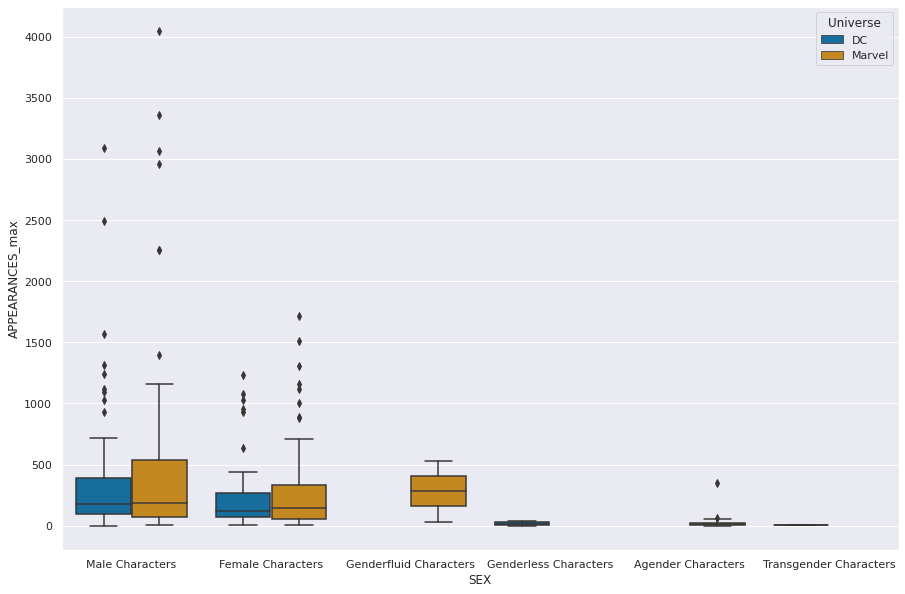

In [33]:
#Box-Plot of Max Appearance vs gender and Universe
plt.figure(figsize=(15,10))
sns.boxplot(y='APPEARANCES_max', x='SEX', 
                 data=inner_join_3, 
                 palette="colorblind",
                 hue='Universe')

plt.show()

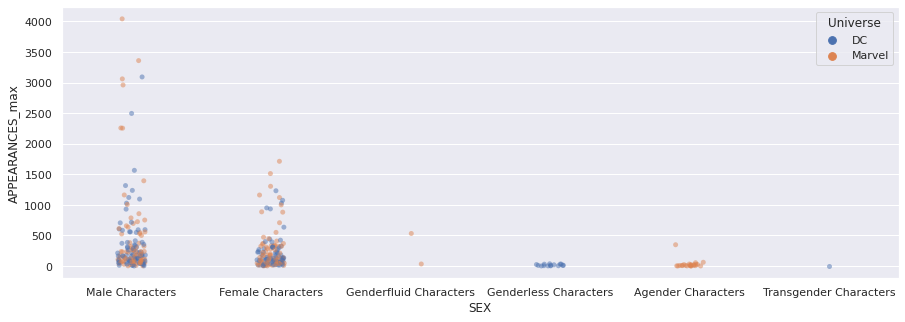

In [34]:
#Same but with scatter plot
plt.figure(figsize=(15,5))
sns.stripplot(y='APPEARANCES_max', x='SEX', 
                 data=inner_join_3, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   hue='Universe')
plt.show()

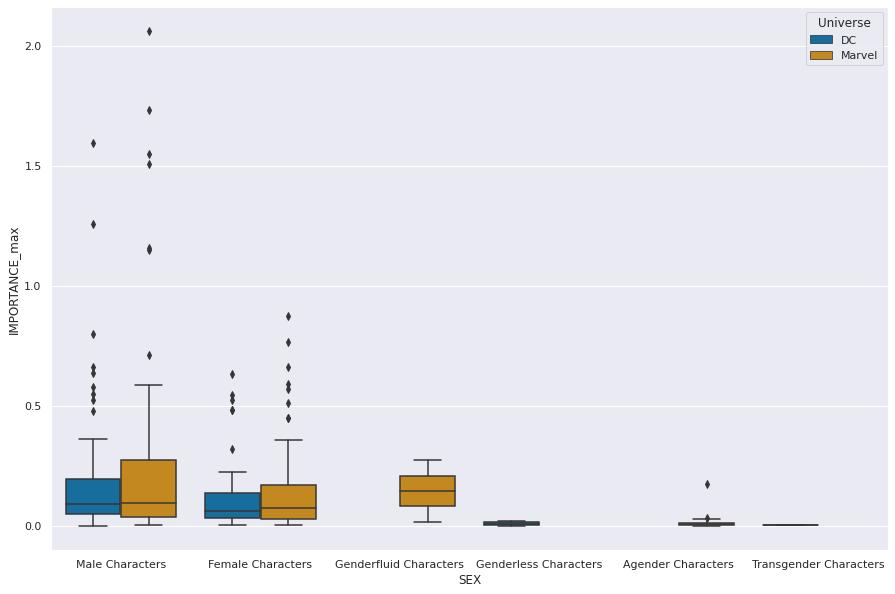

In [37]:
#Box-Plot of Max Importance vs gender and Universe. We dont see significant differences compare to Max Appearance as we would have expected.
plt.figure(figsize=(15,10))
sns.boxplot(y='IMPORTANCE_max', x='SEX', 
                 data=inner_join_4, 
                 palette="colorblind",
                 hue='Universe')

plt.show()

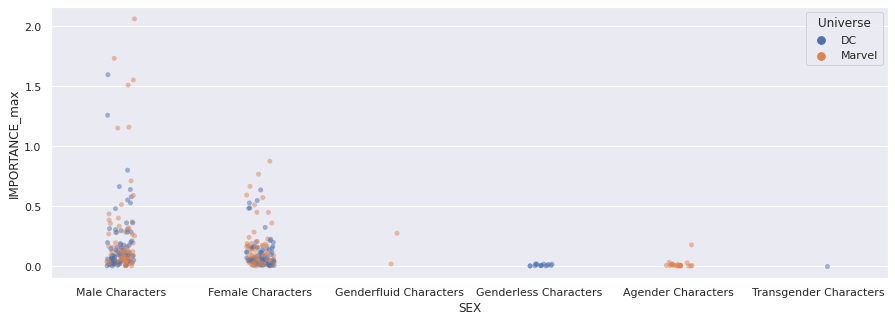

In [39]:
#Same but with scatter plot
plt.figure(figsize=(15,5))
sns.stripplot(y='IMPORTANCE_max', x='SEX', 
                 data=inner_join_4, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   hue='Universe')
plt.show()

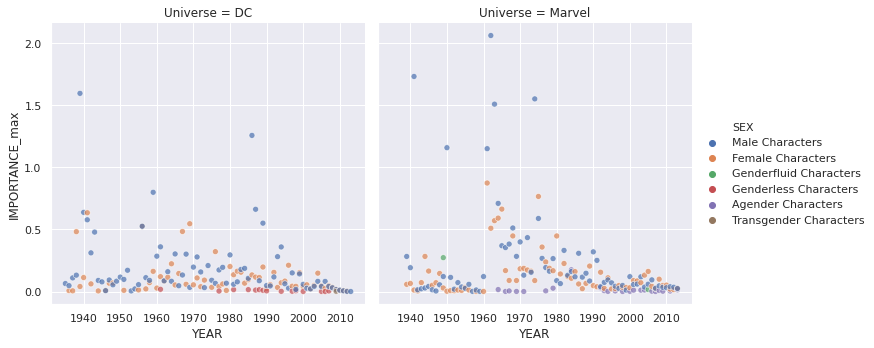

In [40]:
#Max importance over the years for both Universes by gender.
sns.set()

sns.relplot(x="YEAR", y="IMPORTANCE_max", col="Universe",
            hue="SEX", alpha=.7,
            data=inner_join_4);

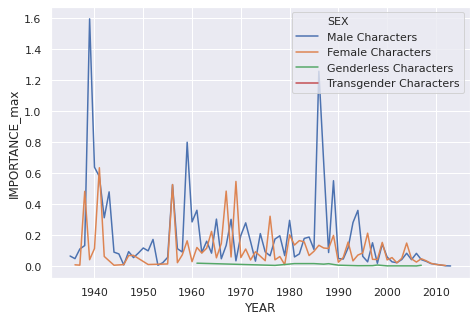

In [45]:
#Same but with line plot for DC only
plt.figure(figsize=(7.5,5))
sns.lineplot(x="YEAR", y="IMPORTANCE_max", 
             hue="SEX",
             data= inner_join_4[(inner_join_4.Universe =='DC')])
plt.show()

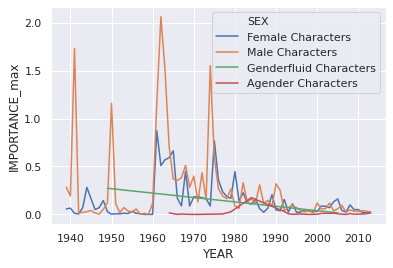

In [46]:
#Same but with line plot for Marvel only
sns.lineplot(x="YEAR", y="IMPORTANCE_max",
             hue="SEX",
             data= inner_join_4[(inner_join_4.Universe =='Marvel')])

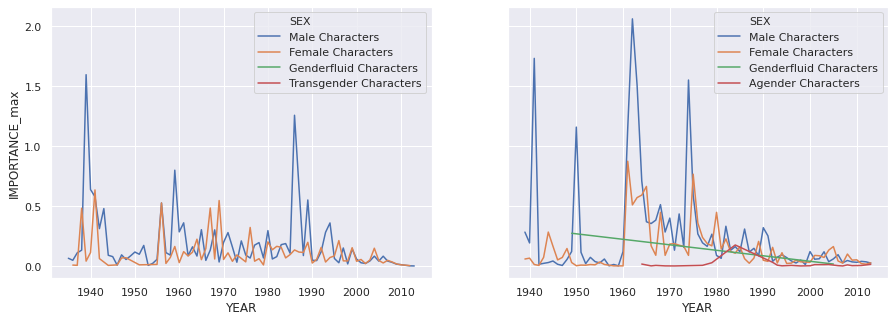

In [47]:
#Same but with line plot for Both Universes

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.lineplot(x='YEAR', y="IMPORTANCE_max",
             hue="SEX", hue_order=["Male Characters", "Female Characters", "Genderfluid Characters", "Transgender Characters"], ax=ax1,
             data= inner_join_4[(inner_join_4.Universe =='DC')])
sns.lineplot(x='YEAR', y="IMPORTANCE_max",
             hue="SEX", hue_order=["Male Characters", "Female Characters", "Genderfluid Characters", "Agender Characters"], ax=ax2,
             data= inner_join_4[(inner_join_4.Universe =='Marvel')])

plt.show()

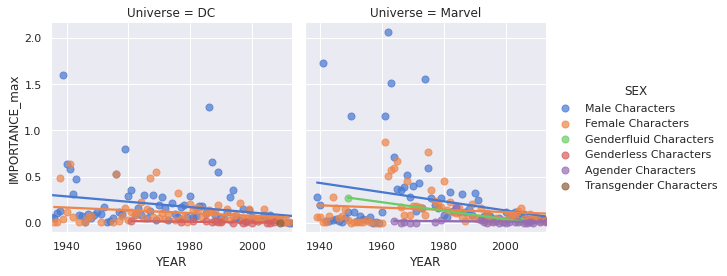

In [49]:
#Same with some linear regresions
sns.lmplot(x="YEAR", y="IMPORTANCE_max", col="Universe", hue="SEX", data=inner_join_4,
           col_wrap=2, ci=None, palette="muted", height=4, 
           scatter_kws={"s": 50, "alpha": 0.7})

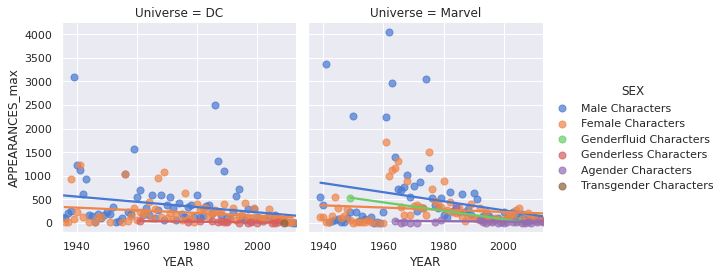

In [50]:
#Same with some linear regresions
sns.lmplot(x="YEAR", y="APPEARANCES_max", col="Universe", hue="SEX", data=inner_join_4,
           col_wrap=2, ci=None, palette="muted", height=4, 
           scatter_kws={"s": 50, "alpha": 0.7})



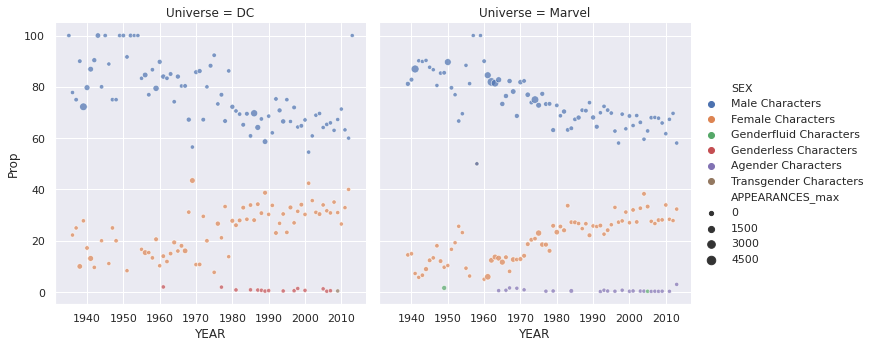

In [54]:
#Now we can combine the proportion of the genders along the yars with the max appearance for each year (size of the dot). We dont see significant difference in appearance comparing genders along the years.
sns.set()

sns.relplot(x="YEAR", y="Prop", col="Universe",
            hue="SEX", alpha=.7, size='APPEARANCES_max',
            data=inner_join_4);

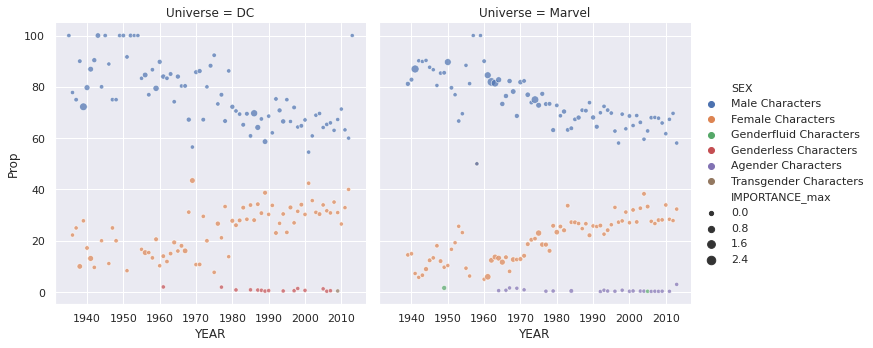

In [53]:
#Same but with Max Immportance instead of max appearance. We also dont see significant differences.
sns.set()

sns.relplot(x="YEAR", y="Prop", col="Universe",
            hue="SEX", alpha=.7, size='IMPORTANCE_max',
            data=inner_join_4);

#*Alignment*

In [55]:
#We want to know how many characters of each alignment and of each Universe where created by Year. To do so, we grouped the dataset using 'YEAR','Universe','ALIGN' generating a new Dataframe
df_Alin = df.groupby(['YEAR','Universe','ALIGN']).size().reset_index(name='counts')
df_Alin

,YEAR,Universe,ALIGN,counts
0,1936.0,DC,Good Characters,6
1,1936.0,DC,Neutral Characters,1
2,1937.0,DC,Good Characters,4
3,1938.0,DC,Good Characters,8
4,1939.0,DC,Bad Characters,4
...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,26
434,2013.0,DC,Bad Characters,1
435,2013.0,Marvel,Bad Characters,49
436,2013.0,Marvel,Good Characters,40


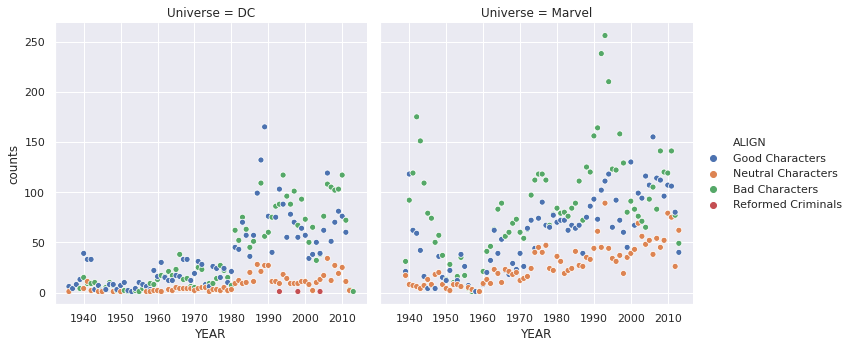

In [56]:
#Graphic showing the number of new characters created by year and by alignment
sns.set()

sns.relplot(x="YEAR", y="counts", col="Universe",
            hue="ALIGN",
            data=df_Alin);

In [57]:
#Get the total number of characters created by Year
df_Alin_total = df.groupby(['YEAR','Universe']).size().reset_index(name='counts')
df_Alin_total['Totals'] = df_Alin_total['counts']
df_Alin_total = df_Alin_total.drop(['counts'], axis=1)
df_Alin_total

,YEAR,Universe,Totals
0,1935.0,DC,1
1,1936.0,DC,9
2,1937.0,DC,4
3,1938.0,DC,10
4,1939.0,DC,18
...,...,...,...
149,2011.0,Marvel,349
150,2012.0,DC,5
151,2012.0,Marvel,201
152,2013.0,DC,1


In [58]:
#Add the total to the dataframe
Alin_join = pd.merge(df_Alin,  
                      df_Alin_total,  
                      on =['YEAR','Universe'],  
                      how ='inner') 
Alin_join

,YEAR,Universe,ALIGN,counts,Totals
0,1936.0,DC,Good Characters,6,9
1,1936.0,DC,Neutral Characters,1,9
2,1937.0,DC,Good Characters,4,4
3,1938.0,DC,Good Characters,8,10
4,1939.0,DC,Bad Characters,4,18
...,...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,26,201
434,2013.0,DC,Bad Characters,1,1
435,2013.0,Marvel,Bad Characters,49,167
436,2013.0,Marvel,Good Characters,40,167


In [59]:
#Calculate proportion of Characters from different alignments
Alin_join ['Prop'] = Alin_join ['counts'] / Alin_join ['Totals'] *100
Alin_join

,YEAR,Universe,ALIGN,counts,Totals,Prop
0,1936.0,DC,Good Characters,6,9,66.666667
1,1936.0,DC,Neutral Characters,1,9,11.111111
2,1937.0,DC,Good Characters,4,4,100.000000
3,1938.0,DC,Good Characters,8,10,80.000000
4,1939.0,DC,Bad Characters,4,18,22.222222
...,...,...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,26,201,12.935323
434,2013.0,DC,Bad Characters,1,1,100.000000
435,2013.0,Marvel,Bad Characters,49,167,29.341317
436,2013.0,Marvel,Good Characters,40,167,23.952096


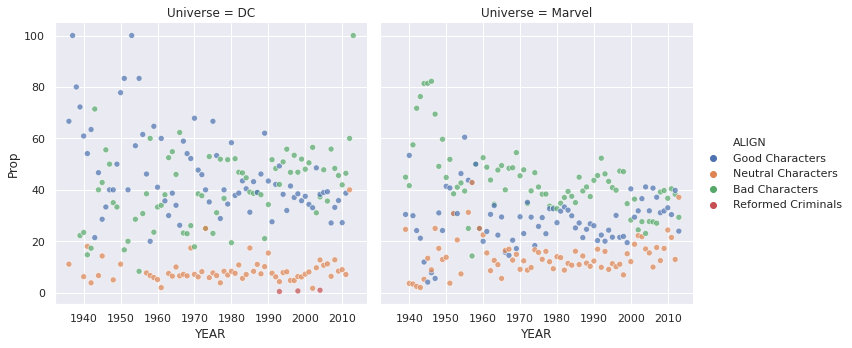

In [60]:
#Graphic showing the proportion of new characters created by year and by alignment
sns.set()

sns.relplot(x="YEAR", y="Prop", col="Universe",
            hue="ALIGN", alpha=.7,
            data=Alin_join);

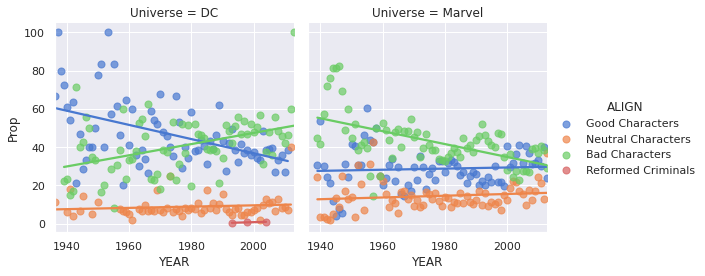

In [61]:
#Same grafic than the one above but with linear regression within each dataset. Here we see some differences between Marvel and DC:
#In general Marvel had more neutral characters than DC along their hole story. At at beginning DC was more enriched in  good characters than bad characters. 
#As opposed, Marvel was more enriched in bad characters than good ones. Along the years, Marvel tended to have euqal amount of Good, bad and Neutral Characters (near 33%). 
#But DC is tending to revert the proportion of bad-good characters with a low amount of neutral characters. 

sns.lmplot(x="YEAR", y="Prop", col="Universe", hue="ALIGN", data=Alin_join,
           col_wrap=2, ci=None, palette="muted", height=4, 
           scatter_kws={"s": 50, "alpha": 0.7})

In [62]:
#Now we want to generate the same Graphic than before, but now including the max appearance of the Characters from that year.
Alin_App_max = df.groupby(['YEAR','Universe','ALIGN'])['APPEARANCES'].max().reset_index()
Alin_App_max['APPEARANCES_max'] = Alin_App_max['APPEARANCES'] 
Alin_App_max=Alin_App_max.drop(['APPEARANCES'], axis=1)
Alin_App_max

,YEAR,Universe,ALIGN,APPEARANCES_max
0,1936.0,DC,Good Characters,52.0
1,1936.0,DC,Neutral Characters,92.0
2,1937.0,DC,Good Characters,213.0
3,1938.0,DC,Good Characters,934.0
4,1939.0,DC,Bad Characters,23.0
...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,12.0
434,2013.0,DC,Bad Characters,1.0
435,2013.0,Marvel,Bad Characters,17.0
436,2013.0,Marvel,Good Characters,53.0


In [63]:
#Same but with max importance.
df_Imp_max = df.groupby(['YEAR','Universe','ALIGN'])['IMPORTANCE'].max().reset_index()
df_Imp_max['IMPORTANCE_max'] = df_Imp_max['IMPORTANCE'] 
df_Imp_max=df_Imp_max.drop(['IMPORTANCE'], axis=1)
df_Imp_max

,YEAR,Universe,ALIGN,IMPORTANCE_max
0,1936.0,DC,Good Characters,0.026860
1,1936.0,DC,Neutral Characters,0.047521
2,1937.0,DC,Good Characters,0.109964
3,1938.0,DC,Good Characters,0.481940
4,1939.0,DC,Bad Characters,0.011862
...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,0.005964
434,2013.0,DC,Bad Characters,0.000497
435,2013.0,Marvel,Bad Characters,0.008445
436,2013.0,Marvel,Good Characters,0.026329


In [64]:
#Add the Max Appearance to the dataframe
Alin_join_2 = pd.merge(Alin_join,  
                      Alin_App_max,  
                      on =['YEAR','Universe','ALIGN'],  
                      how ='inner') 
Alin_join_2

,YEAR,Universe,ALIGN,counts,Totals,Prop,APPEARANCES_max
0,1936.0,DC,Good Characters,6,9,66.666667,52.0
1,1936.0,DC,Neutral Characters,1,9,11.111111,92.0
2,1937.0,DC,Good Characters,4,4,100.000000,213.0
3,1938.0,DC,Good Characters,8,10,80.000000,934.0
4,1939.0,DC,Bad Characters,4,18,22.222222,23.0
...,...,...,...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,26,201,12.935323,12.0
434,2013.0,DC,Bad Characters,1,1,100.000000,1.0
435,2013.0,Marvel,Bad Characters,49,167,29.341317,17.0
436,2013.0,Marvel,Good Characters,40,167,23.952096,53.0


In [65]:
#Add the Max Importance to the dataframe
Alin_join_3 = pd.merge(Alin_join_2,  
                      df_Imp_max,  
                      on =['YEAR','Universe','ALIGN'],  
                      how ='inner') 
Alin_join_3

,YEAR,Universe,ALIGN,counts,Totals,Prop,APPEARANCES_max,IMPORTANCE_max
0,1936.0,DC,Good Characters,6,9,66.666667,52.0,0.026860
1,1936.0,DC,Neutral Characters,1,9,11.111111,92.0,0.047521
2,1937.0,DC,Good Characters,4,4,100.000000,213.0,0.109964
3,1938.0,DC,Good Characters,8,10,80.000000,934.0,0.481940
4,1939.0,DC,Bad Characters,4,18,22.222222,23.0,0.011862
...,...,...,...,...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,26,201,12.935323,12.0,0.005964
434,2013.0,DC,Bad Characters,1,1,100.000000,1.0,0.000497
435,2013.0,Marvel,Bad Characters,49,167,29.341317,17.0,0.008445
436,2013.0,Marvel,Good Characters,40,167,23.952096,53.0,0.026329


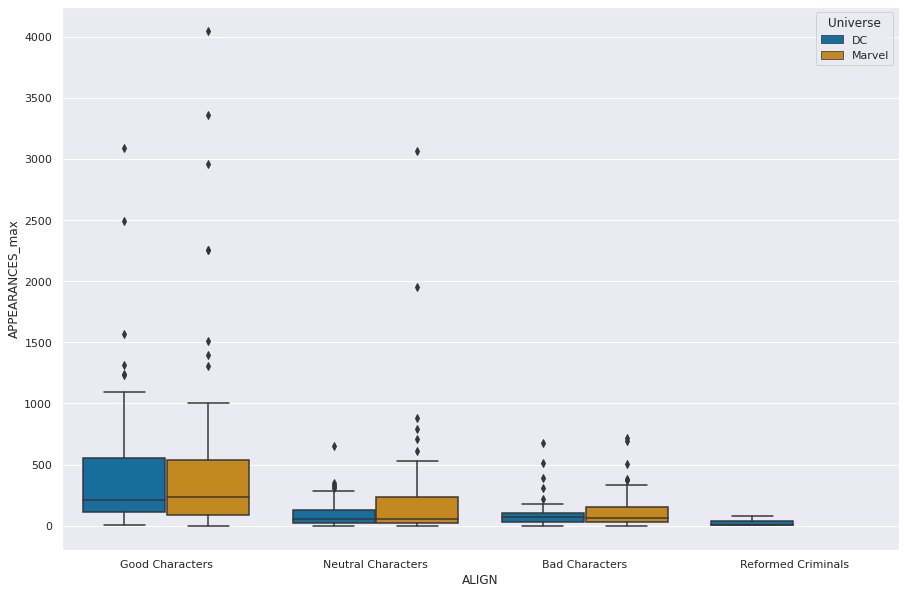

In [66]:
#Box-Plot of Max Appearance vs Alignment and Universe
plt.figure(figsize=(15,10))
sns.boxplot(y='APPEARANCES_max', x='ALIGN', 
                 data=Alin_join_2, 
                 palette="colorblind",
                 hue='Universe')

plt.show()

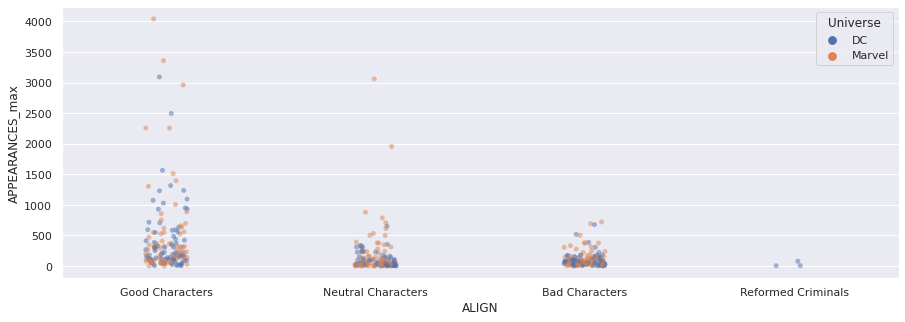

In [67]:
#Same but Scatter-plot
plt.figure(figsize=(15,5))
sns.stripplot(y='APPEARANCES_max', x='ALIGN', 
                 data=Alin_join_2, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   hue='Universe')
plt.show()

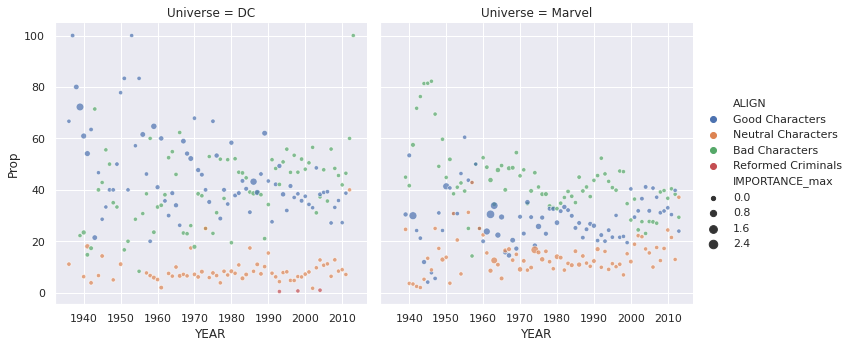

In [68]:
#Now we can combine the proportion of the alignents along the yars with the max imporance for each year (size of the dot). Here we also see a difference between Marvel and DC:
#The Characters with more importance are mostly Good Characters. However, in Marvel we see that Neutral characters are also very importante.
sns.set()

sns.relplot(x="YEAR", y="Prop", col="Universe",
            hue="ALIGN", alpha=.7, size='IMPORTANCE_max',
            data=Alin_join_3);

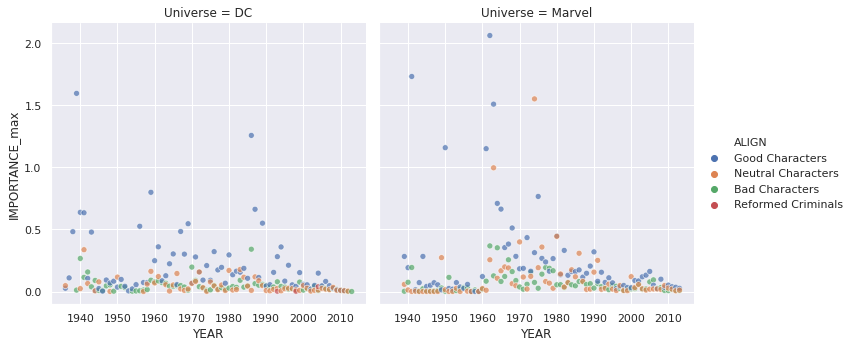

In [69]:
#Max importance over the years for both Universes by alignment.
sns.set()

sns.relplot(x="YEAR", y="IMPORTANCE_max", col="Universe",
            hue="ALIGN", alpha=.7,
            data=Alin_join_3);

<Figure size 1080x720 with 0 Axes>

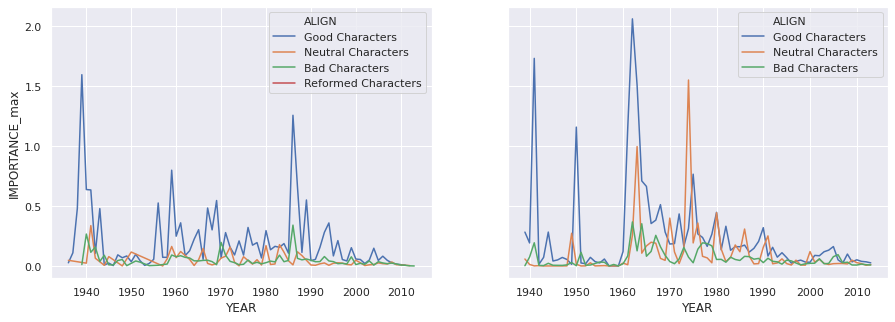

In [70]:
#Same but with line plot for Both Universes

plt.figure(figsize=(15,10))
# call regplot on each axes

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.lineplot(x='YEAR', y="IMPORTANCE_max",
             hue="ALIGN", hue_order=["Good Characters", "Neutral Characters", "Bad Characters", "Reformed Characters"], markers="+", ax=ax1,
             data= Alin_join_3[(Alin_join_3.Universe =='DC')])
sns.lineplot(x='YEAR', y="IMPORTANCE_max",
             hue="ALIGN", hue_order=["Good Characters", "Neutral Characters", "Bad Characters"], ax=ax2,
             data= Alin_join_3[(Alin_join_3.Universe =='Marvel')])

plt.show()